In [21]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
# https://blog.csdn.net/u010758410/article/details/78158781
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
X_train = np.array(pd.read_excel('./data/x_train.xlsx').iloc[:,1:11])
y_train =np.array(pd.read_excel('./data/y_train.xlsx').iloc[:,1:2]) 
X_test =np.array(pd.read_excel('./data/x_test.xlsx').iloc[:,1:11]) 
y_test =np.array(pd.read_excel('./data/y_test.xlsx').iloc[:,1:2]) 

In [22]:
# 数据预处理
# 我们知道，在训练模型的时候，要输入features,即因子，也叫特征。
# 对于同一个特征，不同的样本中的取值可能会相差非常大，一些异常小或异常大的数据会误导模型的正确训练；
# 另外，如果数据的分布很分散也会影响训练结果。以上两种方式都体现在方差会非常大。
# 此时，我们可以将特征中的值进行标准差标准化，即转换为均值为0，方差为1的正态分布。
# 所以在训练模型之前，一定要对特征的数据分布进行探索，并考虑是否有必要将数据进行标准化。 
ss_X=StandardScaler()
ss_y=StandardScaler()
X_train=ss_X.fit_transform(X_train)
X_test=ss_X.transform(X_test)
y_train=ss_y.fit_transform(y_train.reshape(-1, 1))
y_test=ss_y.transform(y_test.reshape(-1, 1))
print(y_train.shape)

(200, 1)


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
# Knn 回归器
uni_knr=KNeighborsRegressor(weights='uniform')   #初始化平均回归的KNN回归器
uni_knr.fit(X_train,y_train)
uni_knr_y_predict=uni_knr.predict(X_test)

dis_knr=KNeighborsRegressor(weights='distance')   #初始化距离加权回归的KNN回归器
dis_knr.fit(X_train,y_train)
dis_knr_y_predict=dis_knr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('平均回归的KNN回归器的R平放方值:',uni_knr.score(X_test,y_test))
print('还原后的方差:',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(uni_knr_y_predict)))
print('没有还原的方差:',mean_squared_error(y_test,uni_knr_y_predict))
print(' ')
print('距离加权回归的KNN回归器的R平方值:',dis_knr.score(X_test,y_test))
# 拟合结果的好坏中重点应该是看R-square，愈接近1，拟合也最理想。其次，看RMSE 均方根误差是否最小。
# https://blog.csdn.net/cymy001/article/details/79112818

平均回归的KNN回归器的R平放方值: 0.6556708044514604
还原后的方差: 74208.959
没有还原的方差: 0.36120241302269535
 
距离加权回归的KNN回归器的R平方值: 0.6804655862274457


画图观察图像

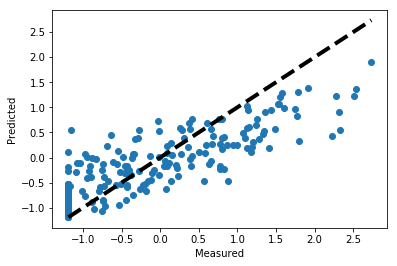

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, uni_knr_y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

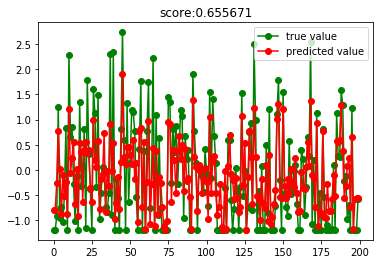

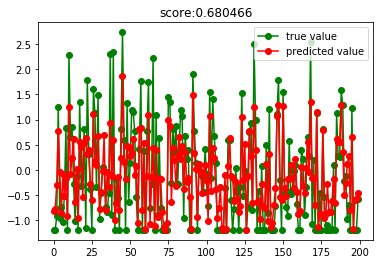

In [26]:
# 回归数据
def try_different_method(model):
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    result=model.predict(X_test)
    plt.figure()
    plt.plot(np.arange(len(result)),y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predicted value')
    plt.title('score:%f'%score)
    plt.legend()
    plt.show()
try_different_method(uni_knr)
try_different_method(dis_knr)